In [55]:
from ast import literal_eval
from utils import sql_manager, aws

### Database connection

In [56]:
db_credentials = literal_eval(aws.get_secret("prod/awsportfolio/key"))
sql = sql_manager.ManagerSQL(db_credentials)

In [57]:
symbol = "MSFT"

In [58]:
returns = sql.select_query(f"select * from returns_monthly where symbol = '{symbol}' order by period")

In [59]:
returns.source.value_counts()

WRDS     433
ALPHA    300
Name: source, dtype: int64

In [60]:
returns.groupby("source").period.min()

source
ALPHA    1999-11
WRDS     1986-03
Name: period, dtype: object

In [61]:
returns.groupby("source").period.max()

source
ALPHA    2024-10
WRDS     2022-03
Name: period, dtype: object

In [62]:
returns_comp = returns[["period", "source", "monthly_return"]].set_index(["period", "source"]).unstack("source")
returns_comp.dropna(inplace=True)

<AxesSubplot:xlabel='period'>

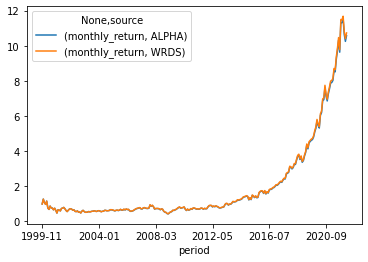

In [63]:
(returns_comp + 1).cumprod().plot()